In [1]:
from collections import deque
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graph_tool as gt
import graph_tool.draw as gtd
import graph_tool.search as gts

In [2]:
import random

In [3]:
from importlib import reload

In [4]:
import tpnet

In [434]:
reload(tpnet)

<module 'tpnet' from '/home/fox/0007_Science/07_transport_model/tpnet.py'>

In [5]:
names = [
    'Alpha', 'Beta', 'Callisto', 'Draco', 'Gemini',
    'Hydra', 'Lynx', 'Orion', 'Phoenix', 'Ursa',
    'Sun', 'Sirius', 'Andromeda', 'Pluto'
]
net = tpnet.Net(len(names), names)

In [436]:
net.spawn_passenger('Beta', dst='Callisto')

In [437]:
net.spawn_car('Beta', dst='Callisto')

In [453]:
net.getstat(what='pgr')

array([[0., 1., 2., 2.]])

In [452]:
net.getstat(what='car')

array([[ 0.,  2.,  2.,  2., 20.,  1.]])

In [454]:
net.allpassengers[0]

In [464]:
net.allcars[0].inside

deque([])

In [466]:
net.vinside[2]

deque([<tpnet.Passenger at 0x7f71f0ce0cc0>])

In [424]:
net.allpassengers[0].get_next() in net.allcars[0].route

True

In [459]:
net.allcars[0].route

deque([])

In [433]:
net.allcars[0].get_next()

2

In [463]:
net.ptransfer()
net.move_cars()

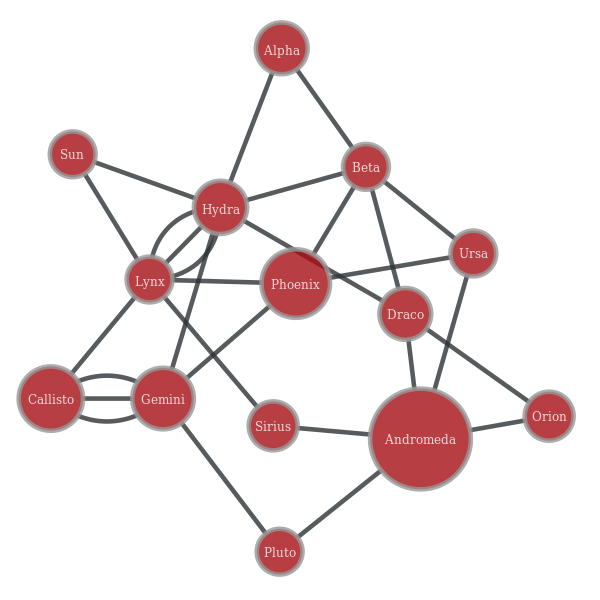

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fdabd49f668, at 0x7fdabd49fcc0>

In [6]:
gtd.graph_draw(net.g, vertex_text=net.vname, inline=True)